In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from cmdstanpy import CmdStanModel
from logging import getLogger

stan_logger = getLogger("cmdstanpy")
stan_logger.disabled = True

from pandas import read_csv

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
stan_model = CmdStanModel(stan_file="../../stan/hmm-eam.stan")

In [3]:
def configure_data(path):
    df = read_csv(path)
    df = np.array(df)
    df = df[:400,...]

    rts = df[:,1:2].astype(np.float32)
    choice = np.abs(df[:,2]-3)

    output = {
        "stan_inputs": {
            "n_obs": len(rts),
            "y": [(int(c), r) for c, r in zip(choice, rts[:,0])]
        },
        "rt": rts[:,0],
        "choice": choice
    }
    return output

In [4]:
stan_fits = {}
file_names = sorted(os.listdir(os.path.join('dutilh-resources', 'data')))

for file in file_names:
    subject = os.path.splitext(file)[0]
    print(subject)
    path = os.path.join('dutilh-resources', 'data', file)

    df = configure_data(path)


    fit = stan_model.sample(df['stan_inputs'], adapt_delta=0.99, show_progress=False, inits=0)
    print(fit.diagnose())

    stan_fits[subject] = fit


subject-a
Processing csv files: /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpqqxi747b/hmm-eam2h5yomd4/hmm-eam-20240826142336_1.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpqqxi747b/hmm-eam2h5yomd4/hmm-eam-20240826142336_2.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpqqxi747b/hmm-eam2h5yomd4/hmm-eam-20240826142336_3.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpqqxi747b/hmm-eam2h5yomd4/hmm-eam-20240826142336_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.

subject-b
Processing csv files: /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpqqxi747b/hmm-eam8xx91vyf/hmm-eam-20240826142500_1.csv, /var/folders/vn/tvq3_rgx6

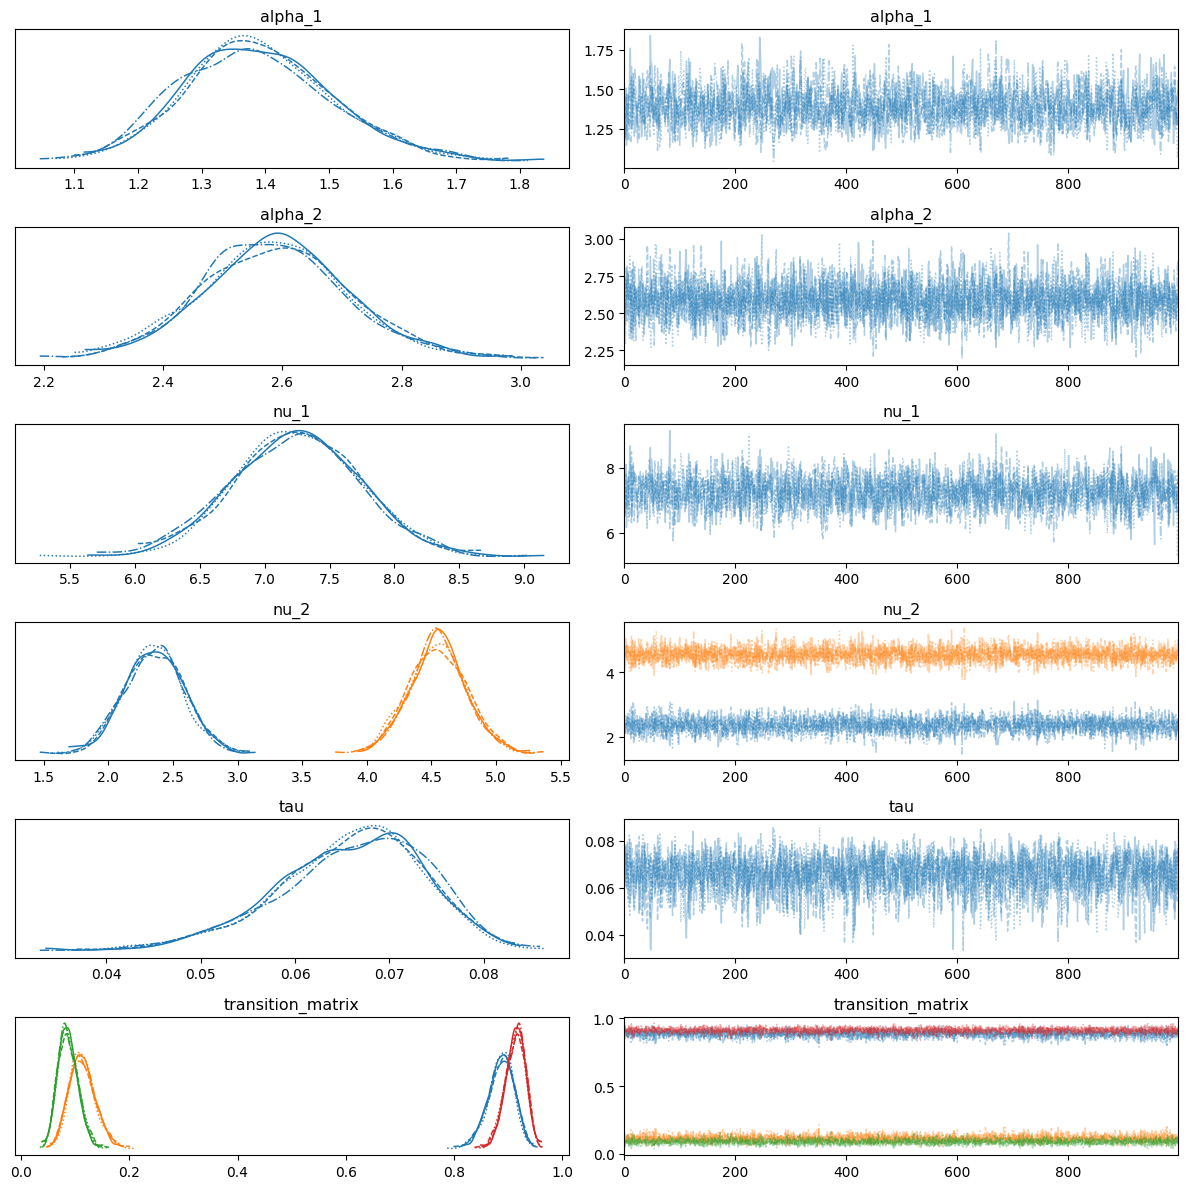

In [5]:
f = az.plot_trace(stan_fits['subject-a'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

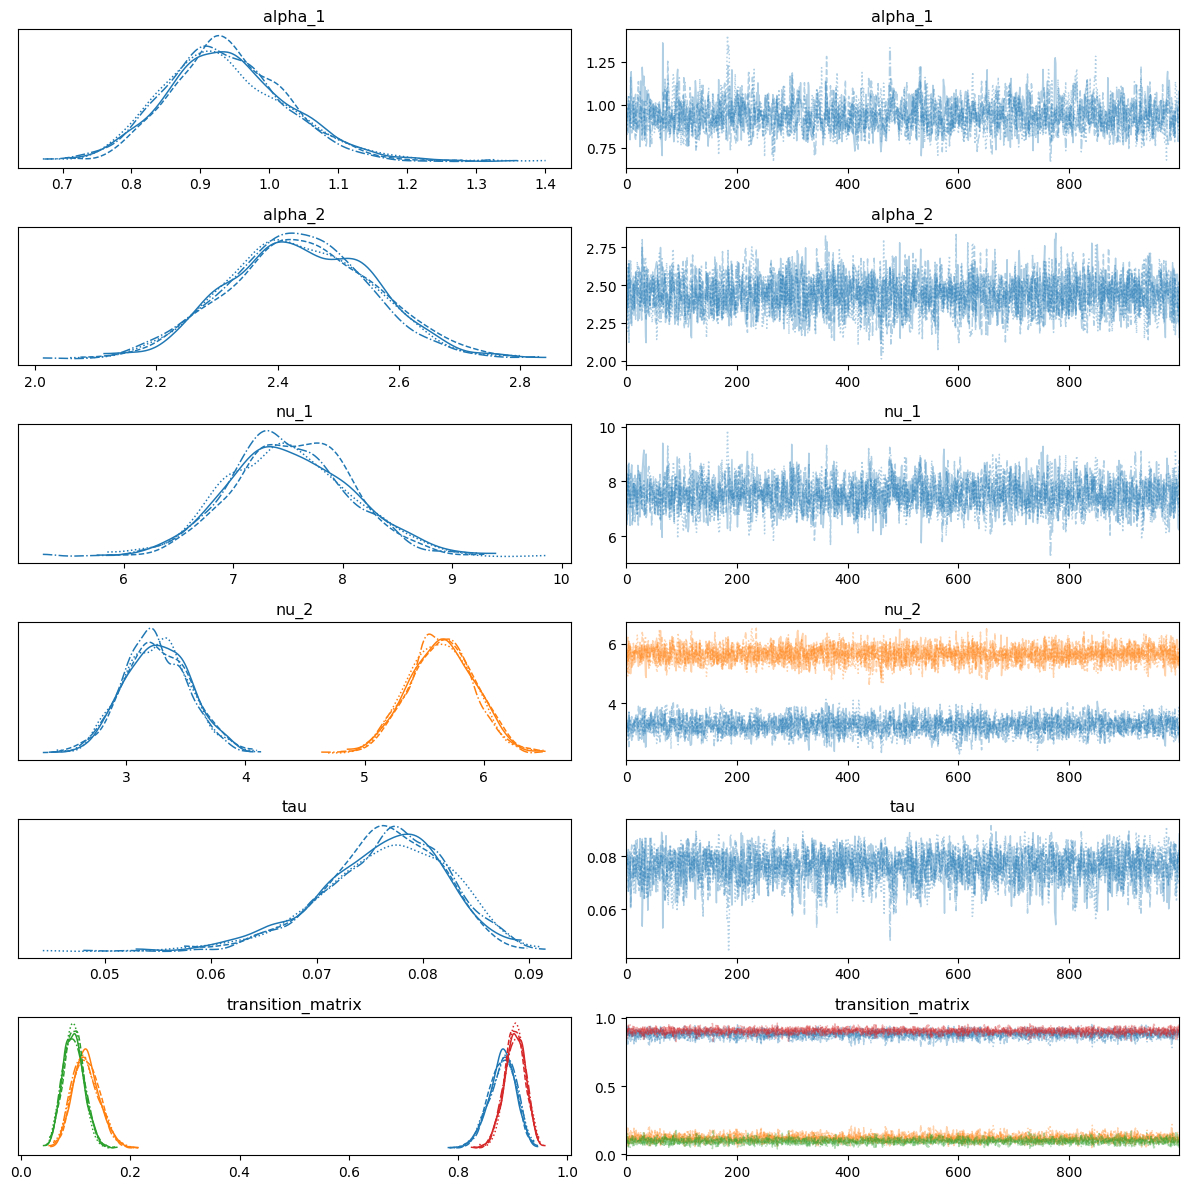

In [6]:
f = az.plot_trace(stan_fits['subject-d'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

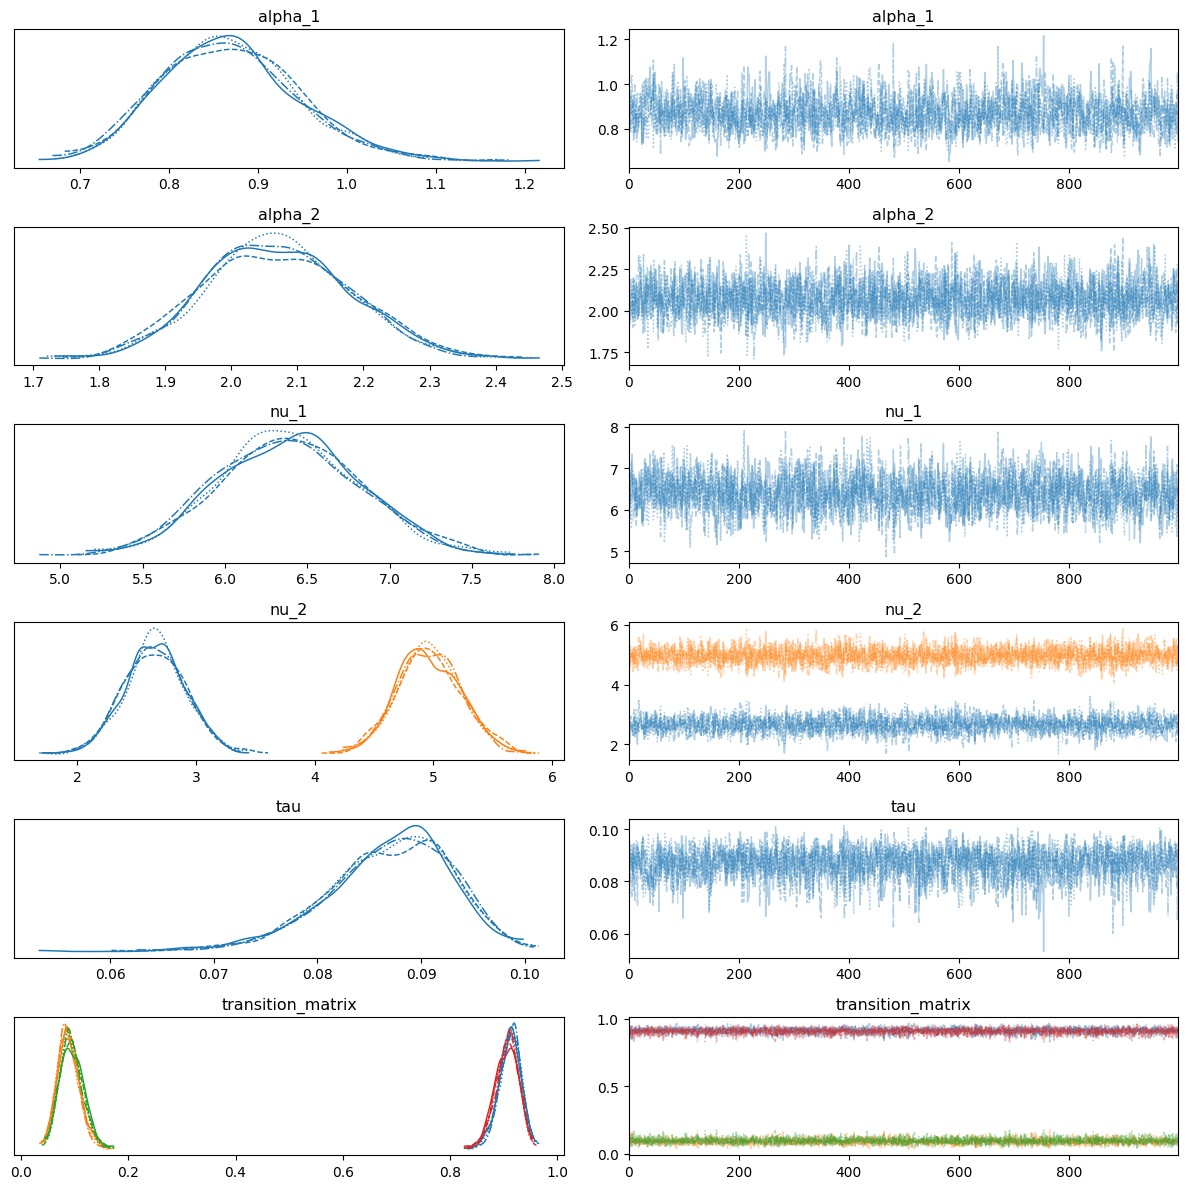

In [7]:
f = az.plot_trace(stan_fits['subject-k'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

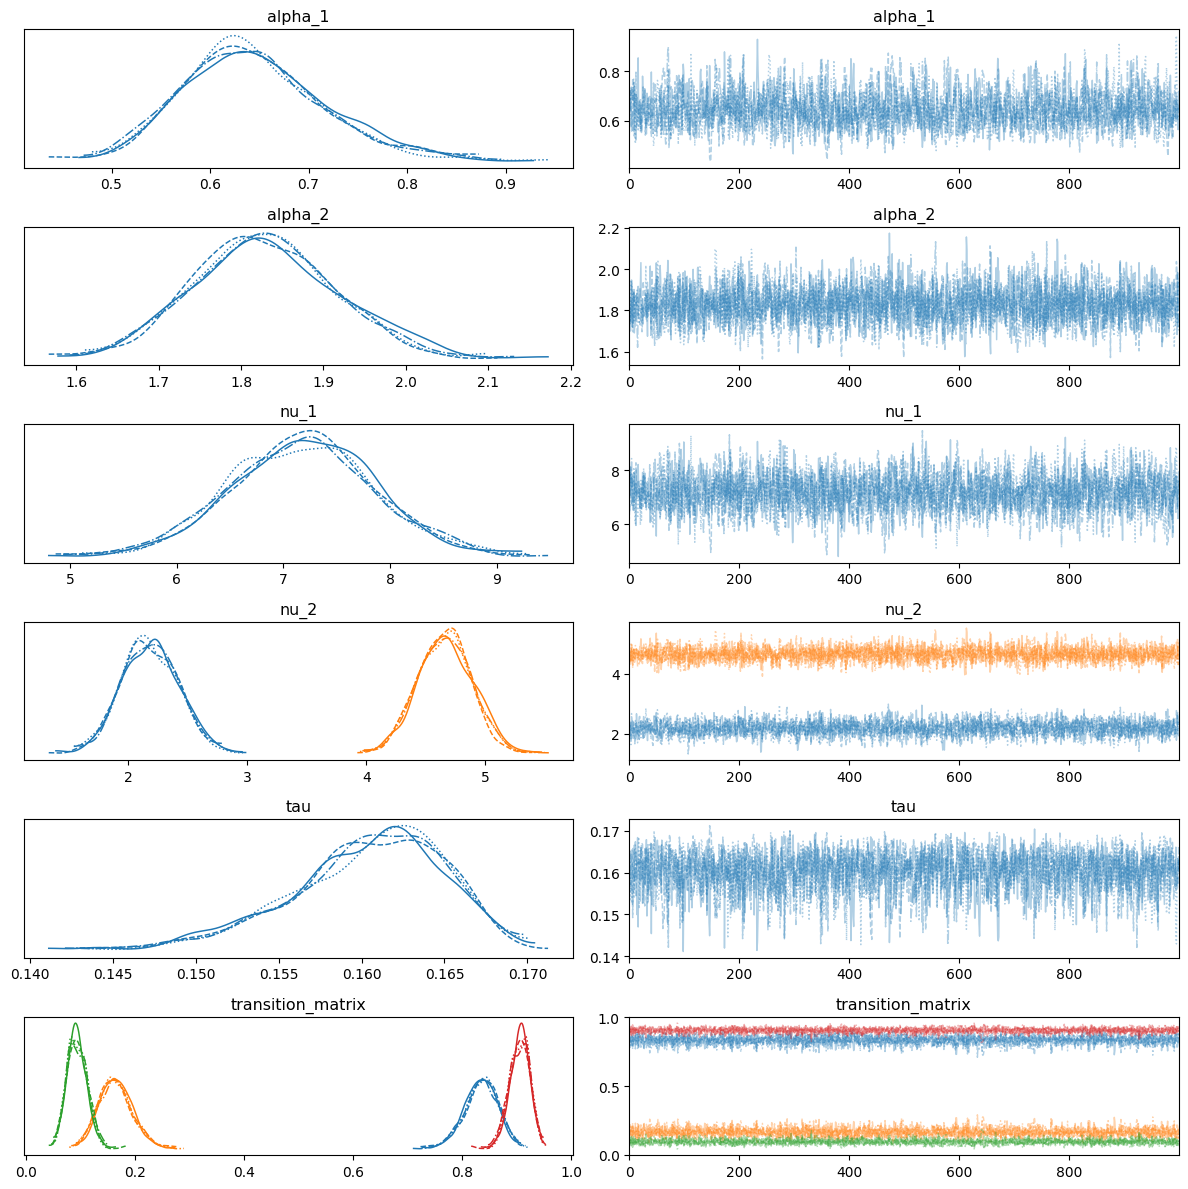

In [8]:
f = az.plot_trace(stan_fits['subject-b'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

In [9]:
pars = ["transition_matrix[1,1]", "transition_matrix[2,2]", "alpha_1", "alpha_2", "nu_1", "nu_2[1]", "nu_2[2]", "tau"]
summaries = {}
for subject, fit in stan_fits.items():
    print(subject)
    summary = fit.summary()
    summaries[subject] = summary.loc[pars]

subject-a
subject-b
subject-c
subject-d
subject-e
subject-f
subject-g
subject-h
subject-i
subject-j
subject-k


In [10]:
summary = pd.concat(summaries.values(), ignore_index=False)

In [11]:
summary.loc['alpha_1']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha_1,1.389580,0.002830,0.116660,1.209490,1.381910,1.597250,1704.080810,12.559000,1.000440
alpha_1,0.644359,0.001675,0.072508,0.535874,0.637878,0.774179,1874.354484,14.408026,1.000861
alpha_1,0.988050,0.002960,0.125710,0.800580,0.974830,1.210090,1805.355420,13.901140,1.001400
alpha_1,0.938420,0.002370,0.089170,0.803170,0.932190,1.090440,1418.070120,10.519340,1.003010
alpha_1,0.876754,0.002122,0.090572,0.743840,0.867002,1.043260,1821.096828,13.067759,1.000500
alpha_1,0.613860,0.002140,0.087110,0.489350,0.603900,0.771790,1658.524710,12.143160,1.002090
alpha_1,1.137526,0.002586,0.109825,0.968327,1.129820,1.332280,1802.926019,15.411205,1.000965
alpha_1,0.357280,0.001024,0.042186,0.295804,0.352818,0.434105,1697.033553,21.915588,1.002679
alpha_1,0.476570,0.001460,0.059660,0.388670,0.470510,0.585990,1677.319530,16.964730,1.001440
alpha_1,0.472410,0.001550,0.058010,0.387500,0.467490,0.573710,1392.137030,12.657060,1.004430


In [12]:
summary.loc['alpha_2']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha_2,2.587419,0.002229,0.123037,2.38571,2.58669,2.79682,3048.133597,22.464614,1.000294
alpha_2,1.828560,0.001590,0.087000,1.68915,1.82544,1.97485,3009.965180,23.137380,1.000880
alpha_2,2.436080,0.002620,0.142370,2.21143,2.43267,2.68150,2952.933800,22.737440,0.999490
alpha_2,2.436470,0.002430,0.117460,2.24638,2.43385,2.63226,2343.762990,17.386190,1.001210
alpha_2,2.250949,0.002721,0.138486,2.02707,2.24672,2.48641,2590.054704,18.585619,0.999693
alpha_2,1.784900,0.002590,0.118610,1.60280,1.77636,1.99184,2095.417360,15.341940,1.001460
alpha_2,2.023540,0.002400,0.127530,1.82010,2.01993,2.23880,2817.314580,24.082080,1.000810
alpha_2,1.628800,0.001410,0.075630,1.50593,1.62822,1.75408,2869.263930,37.053840,1.000220
alpha_2,1.649390,0.002360,0.109930,1.47844,1.64456,1.83524,2177.873140,22.027420,1.002580
alpha_2,1.584500,0.001660,0.080960,1.45839,1.58255,1.72023,2366.022970,21.511450,1.001540


In [13]:
summary.loc['nu_1']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
nu_1,7.246510,0.010680,0.482260,6.45597,7.24904,8.03502,2038.981180,15.027200,1.000330
nu_1,7.179281,0.014242,0.675556,6.05648,7.18345,8.30467,2249.840361,17.294358,1.000385
nu_1,5.478230,0.011180,0.525440,4.63281,5.46733,6.34772,2210.592830,17.021450,1.001590
nu_1,7.520360,0.013260,0.555980,6.64824,7.49229,8.46068,1756.994810,13.033510,1.002040
nu_1,6.080437,0.011603,0.537857,5.24652,6.05154,6.99427,2148.787088,15.419187,1.000683
nu_1,5.519690,0.012640,0.534970,4.65416,5.51116,6.40713,1790.219140,13.107380,1.001720
nu_1,5.783791,0.013334,0.556684,4.84002,5.77603,6.67697,1743.044076,14.899341,1.000929
nu_1,4.894666,0.013791,0.608036,3.92641,4.86669,5.94480,1943.744227,25.101624,1.001912
nu_1,4.458250,0.009250,0.426060,3.77569,4.45619,5.17866,2122.269780,21.465040,1.001270
nu_1,5.627490,0.013320,0.595860,4.68602,5.61010,6.63819,2002.089820,18.202640,1.003760


In [14]:
summary.loc['nu_2[1]']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
nu_2[1],2.35401,0.004461,0.230801,1.97681,2.35764,2.73672,2676.96,19.7291,1.000300
nu_2[1],2.18130,0.004513,0.239717,1.79241,2.17588,2.57941,2821.76,21.6907,1.000080
nu_2[1],2.66078,0.004855,0.263667,2.23713,2.66042,3.09301,2949.63,22.7120,0.999704
nu_2[1],3.25540,0.006089,0.277935,2.80152,3.24857,3.71753,2083.60,15.4563,1.000970
nu_2[1],3.01141,0.005865,0.302161,2.52256,3.01325,3.50661,2654.64,19.0491,0.999531
nu_2[1],2.28010,0.006283,0.279810,1.82223,2.27649,2.73362,1983.48,14.5224,1.001760
nu_2[1],2.89763,0.004953,0.264777,2.46612,2.89348,3.33193,2858.13,24.4310,0.999332
nu_2[1],1.92065,0.003640,0.191699,1.59601,1.91994,2.23437,2773.72,35.8199,0.999968
nu_2[1],2.09184,0.005122,0.236727,1.70848,2.08844,2.48393,2135.92,21.6031,1.002370
nu_2[1],2.75258,0.005056,0.239032,2.36581,2.75661,3.14759,2235.43,20.3241,1.001470


In [15]:
summary.loc['nu_2[2]']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
nu_2[2],4.54992,0.003728,0.221870,4.17710,4.54755,4.92361,3541.20,26.0985,0.999419
nu_2[2],4.66121,0.004161,0.229278,4.27944,4.66254,5.03778,3036.12,23.3384,1.000980
nu_2[2],4.98252,0.004490,0.264245,4.55779,4.97731,5.43673,3463.36,26.6677,1.000680
nu_2[2],5.64275,0.005737,0.274741,5.18592,5.64551,6.08423,2293.17,17.0109,1.000780
nu_2[2],5.58116,0.006184,0.325451,5.05308,5.57698,6.12128,2770.06,19.8773,0.999943
nu_2[2],4.64598,0.006476,0.298609,4.16808,4.63407,5.15946,2126.04,15.5661,1.001180
nu_2[2],4.64012,0.005340,0.285276,4.17074,4.63713,5.11292,2853.80,24.3939,1.000190
nu_2[2],3.64441,0.003564,0.196018,3.32776,3.64399,3.95832,3024.11,39.0536,1.000670
nu_2[2],3.65692,0.004929,0.251899,3.25411,3.65070,4.06838,2612.26,26.4209,1.001970
nu_2[2],4.46912,0.004797,0.245309,4.07026,4.46311,4.87430,2614.72,23.7726,1.001060


In [16]:
summary.loc['tau']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
tau,0.065820,0.000170,0.007940,0.051240,0.066660,0.077460,2250.171260,16.583670,1.000070
tau,0.160273,0.000103,0.004790,0.151377,0.160891,0.166956,2170.587580,16.685148,1.000430
tau,0.099480,0.000260,0.011780,0.077460,0.100900,0.116430,2110.318710,16.249350,1.000250
tau,0.076340,0.000130,0.005880,0.065630,0.076880,0.084980,1907.595850,14.150670,1.001880
tau,0.122176,0.000156,0.007220,0.108978,0.123159,0.132268,2150.211915,15.429411,1.000274
tau,0.168620,0.000180,0.007690,0.154450,0.169720,0.179270,1830.890960,13.405170,1.001970
tau,0.098246,0.000186,0.008792,0.082517,0.099033,0.111254,2241.736032,19.162102,1.000093
tau,0.147974,0.000077,0.003362,0.141525,0.148574,0.152409,1915.232775,24.733425,1.001323
tau,0.135400,0.000140,0.005980,0.124530,0.136160,0.143780,1824.378520,18.452110,1.001430
tau,0.141510,0.000120,0.004640,0.132710,0.142150,0.147890,1513.828550,13.763450,1.004220


In [17]:
for subject, fit in stan_fits.items():
    print(subject)

    path = os.path.join('dutilh-resources', 'stan-fits', subject)
    with open(path + '.pkl', 'wb') as f:
        pickle.dump(fit, f)

subject-a
subject-b
subject-c
subject-d
subject-e
subject-f
subject-g
subject-h
subject-i
subject-j
subject-k
